Loading the dataset

In [1]:
import numpy as np;
import pandas as pd; 
import matplotlib as plt;
import matplotlib as pyplot;


In [2]:
dataset = pd.read_csv('train_project.csv')
dataset.head(10)

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0


Data exploration

In [3]:

#Summary Statistics for the dataset, including both numeric and categorical columns if exists 
state_summary = dataset.describe(include='all')
print(state_summary)

       profilepic  numslengthusername  fullnamewords  numslengthfullname  \
count  576.000000          576.000000     576.000000          576.000000   
mean     0.701389            0.163837       1.460069            0.036094   
std      0.458047            0.214096       1.052601            0.125121   
min      0.000000            0.000000       0.000000            0.000000   
25%      0.000000            0.000000       1.000000            0.000000   
50%      1.000000            0.000000       1.000000            0.000000   
75%      1.000000            0.310000       2.000000            0.000000   
max      1.000000            0.920000      12.000000            1.000000   

       name==username  descriptionlength  externalURL     private  \
count      576.000000         576.000000   576.000000  576.000000   
mean         0.034722          22.623264     0.116319    0.381944   
std          0.183234          37.702987     0.320886    0.486285   
min          0.000000           0.00000

In [4]:
#Understanding the overall structure and composition of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   profilepic          576 non-null    int64  
 1   numslengthusername  576 non-null    float64
 2   fullnamewords       576 non-null    int64  
 3   numslengthfullname  576 non-null    float64
 4   name==username      576 non-null    int64  
 5   descriptionlength   576 non-null    int64  
 6   externalURL         576 non-null    int64  
 7   private             576 non-null    int64  
 8   posts               576 non-null    int64  
 9   followers           576 non-null    int64  
 10  follows             576 non-null    int64  
 11  fake                576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [5]:
#Examine the NULL values in the dataset if any 
dataset.isnull().sum()

profilepic            0
numslengthusername    0
fullnamewords         0
numslengthfullname    0
name==username        0
descriptionlength     0
externalURL           0
private               0
posts                 0
followers             0
follows               0
fake                  0
dtype: int64

In [6]:
print(dataset.shape)

(576, 12)


In [7]:
#Identifying the number of unique elements in each column of a DataFrame
dataset.nunique()

profilepic              2
numslengthusername     54
fullnamewords           9
numslengthfullname     25
name==username          2
descriptionlength     104
externalURL             2
private                 2
posts                 193
followers             372
follows               400
fake                    2
dtype: int64

In [8]:
#Count of the occurrences of each unique value in a specific column - 'follows'
dataset['follows'].value_counts()

follows
0       11
1        6
26       6
37       5
22       5
        ..
1196     1
446      1
399      1
535      1
487      1
Name: count, Length: 400, dtype: int64

In [9]:
#Examination of Numerical Features

In [9]:
features=dataset.drop("fake",axis=1)
features.describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')

#Below the dark cells indicate higher values of mean, standard deviation, median, or count compared to the rest of the cells in those columns, while the lighter cells indicate lower values. This gradient coloring can help visually identify outliers or areas of interest within the dataset's descriptive statistics.

,count,mean,std,min,25%,50%,75%,max
profilepic,576.000000,0.701389,0.458047,0.000000,0.000000,1.000000,1.000000,1.000000
numslengthusername,576.000000,0.163837,0.214096,0.000000,0.000000,0.000000,0.310000,0.920000
fullnamewords,576.000000,1.460069,1.052601,0.000000,1.000000,1.000000,2.000000,12.000000
numslengthfullname,576.000000,0.036094,0.125121,0.000000,0.000000,0.000000,0.000000,1.000000
name==username,576.000000,0.034722,0.183234,0.000000,0.000000,0.000000,0.000000,1.000000
descriptionlength,576.000000,22.623264,37.702987,0.000000,0.000000,0.000000,34.000000,150.000000
externalURL,576.000000,0.116319,0.320886,0.000000,0.000000,0.000000,0.000000,1.000000
private,576.000000,0.381944,0.486285,0.000000,0.000000,0.000000,1.000000,1.000000
posts,576.000000,107.489583,402.034431,0.000000,0.000000,9.000000,81.500000,7389.000000
followers,576.000000,85307.236111,910148.457657,0.000000,39.000000,150.500000,716.000000,15338538.000000


In [11]:
dataset[dataset['fake']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')
#The dark color in the output cells, as described before, indicates higher values of the specified statistical measures (mean, std, median, or count) relative to the rest of the cells in those columns. This can help visually identify patterns or outliers specifically within the subset of the dataset where the 'fake' column equals 0.

,count,mean,std,min,25%,50%,75%,max
profilepic,288.000000,0.993056,0.083188,0.000000,1.000000,1.000000,1.000000,1.000000
numslengthusername,288.000000,0.038125,0.088593,0.000000,0.000000,0.000000,0.000000,0.450000
fullnamewords,288.000000,1.774306,1.249850,0.000000,1.000000,2.000000,2.000000,12.000000
numslengthfullname,288.000000,0.005243,0.034113,0.000000,0.000000,0.000000,0.000000,0.330000
name==username,288.000000,0.003472,0.058926,0.000000,0.000000,0.000000,0.000000,1.000000
descriptionlength,288.000000,39.982639,42.793846,0.000000,0.000000,27.000000,62.000000,150.000000
externalURL,288.000000,0.232639,0.423249,0.000000,0.000000,0.000000,0.000000,1.000000
private,288.000000,0.395833,0.489880,0.000000,0.000000,0.000000,1.000000,1.000000
posts,288.000000,206.045139,550.951848,0.000000,16.750000,74.000000,214.000000,7389.000000
followers,288.000000,170503.885417,1282598.579512,9.000000,258.500000,661.500000,1694.250000,15338538.000000


In [10]:
dataset[dataset['fake']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')
#The dark color in the output cells indicates higher values of the specified statistical measures (mean, std, median, or count) relative to the rest of the cells in those columns within the subset of the dataset where the 'fake' column equals 1. This visual representation helps in identifying patterns or outliers specifically within this subset of the dataset.

,count,mean,std,min,25%,50%,75%,max
profilepic,288.000000,0.409722,0.492638,0.000000,0.000000,0.000000,1.000000,1.000000
numslengthusername,288.000000,0.289549,0.228621,0.000000,0.087500,0.300000,0.430000,0.920000
fullnamewords,288.000000,1.145833,0.677860,0.000000,1.000000,1.000000,1.000000,5.000000
numslengthfullname,288.000000,0.066944,0.168199,0.000000,0.000000,0.000000,0.000000,1.000000
name==username,288.000000,0.065972,0.248666,0.000000,0.000000,0.000000,0.000000,1.000000
descriptionlength,288.000000,5.263889,20.294688,0.000000,0.000000,0.000000,0.000000,149.000000
externalURL,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
private,288.000000,0.368056,0.483116,0.000000,0.000000,0.000000,1.000000,1.000000
posts,288.000000,8.934028,28.009316,0.000000,0.000000,0.000000,5.000000,299.000000
followers,288.000000,110.586806,318.407808,0.000000,15.000000,40.000000,79.750000,3033.000000


In [13]:
#Identification of Outlayers with respect to Target Feature
#Each boxplot will have the 'fake' column on the x-axis (showing the two categories: 0 and 1) and the specified numeric feature on the y-axis. These boxplots provide insights into the distribution of each feature within each category of the 'fake' column, allowing for comparison and identification of potential differences or patterns.

<Axes: xlabel='fake', ylabel='follows'>

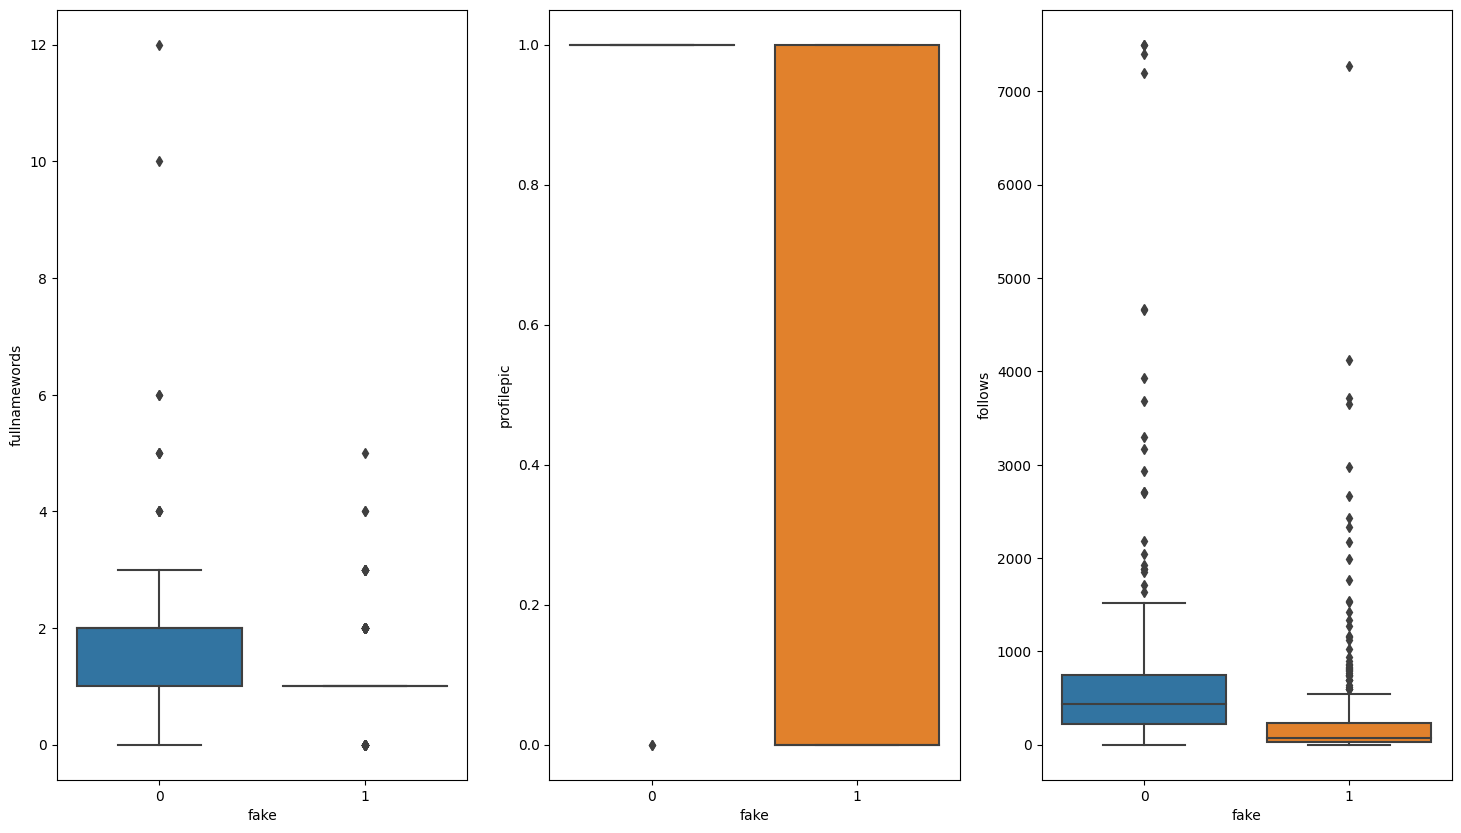

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0], data=dataset, x='fake', y='fullnamewords')
sns.boxplot(ax=axes[1], data=dataset, x='fake', y='profilepic')
sns.boxplot(ax=axes[2], data=dataset, x='fake', y='follows')
 
 

<Axes: xlabel='fake', ylabel='descriptionlength'>

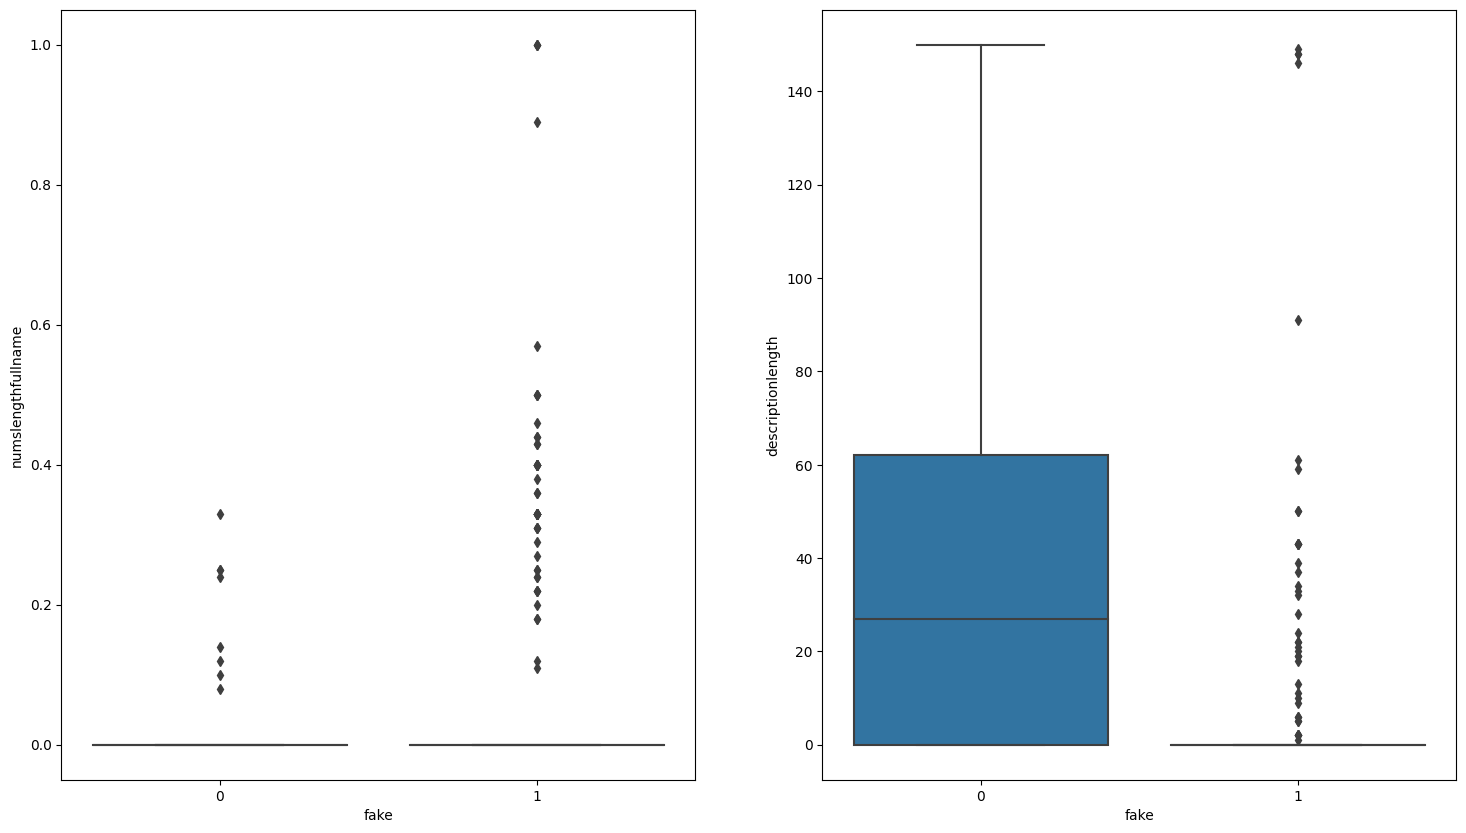

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(ax=axes[0], data=dataset, x='fake', y='numslengthfullname')
sns.boxplot(ax=axes[1], data=dataset, x='fake', y='descriptionlength')
 

<Axes: xlabel='fake', ylabel='followers'>

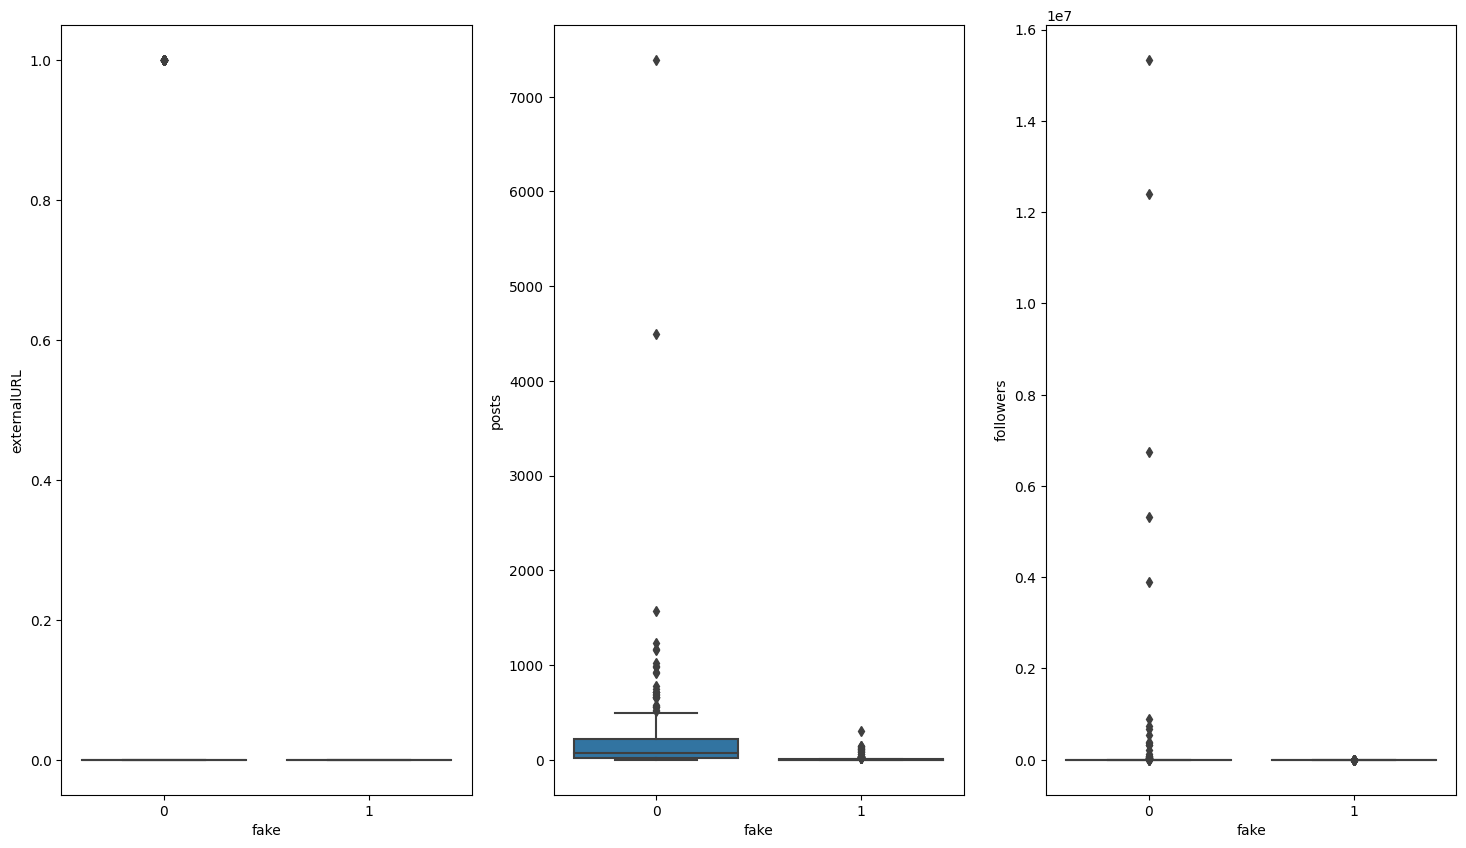

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0], data=dataset, x='fake', y='externalURL')
sns.boxplot(ax=axes[1], data=dataset, x='fake', y='posts')
sns.boxplot(ax=axes[2], data=dataset, x='fake', y='followers')

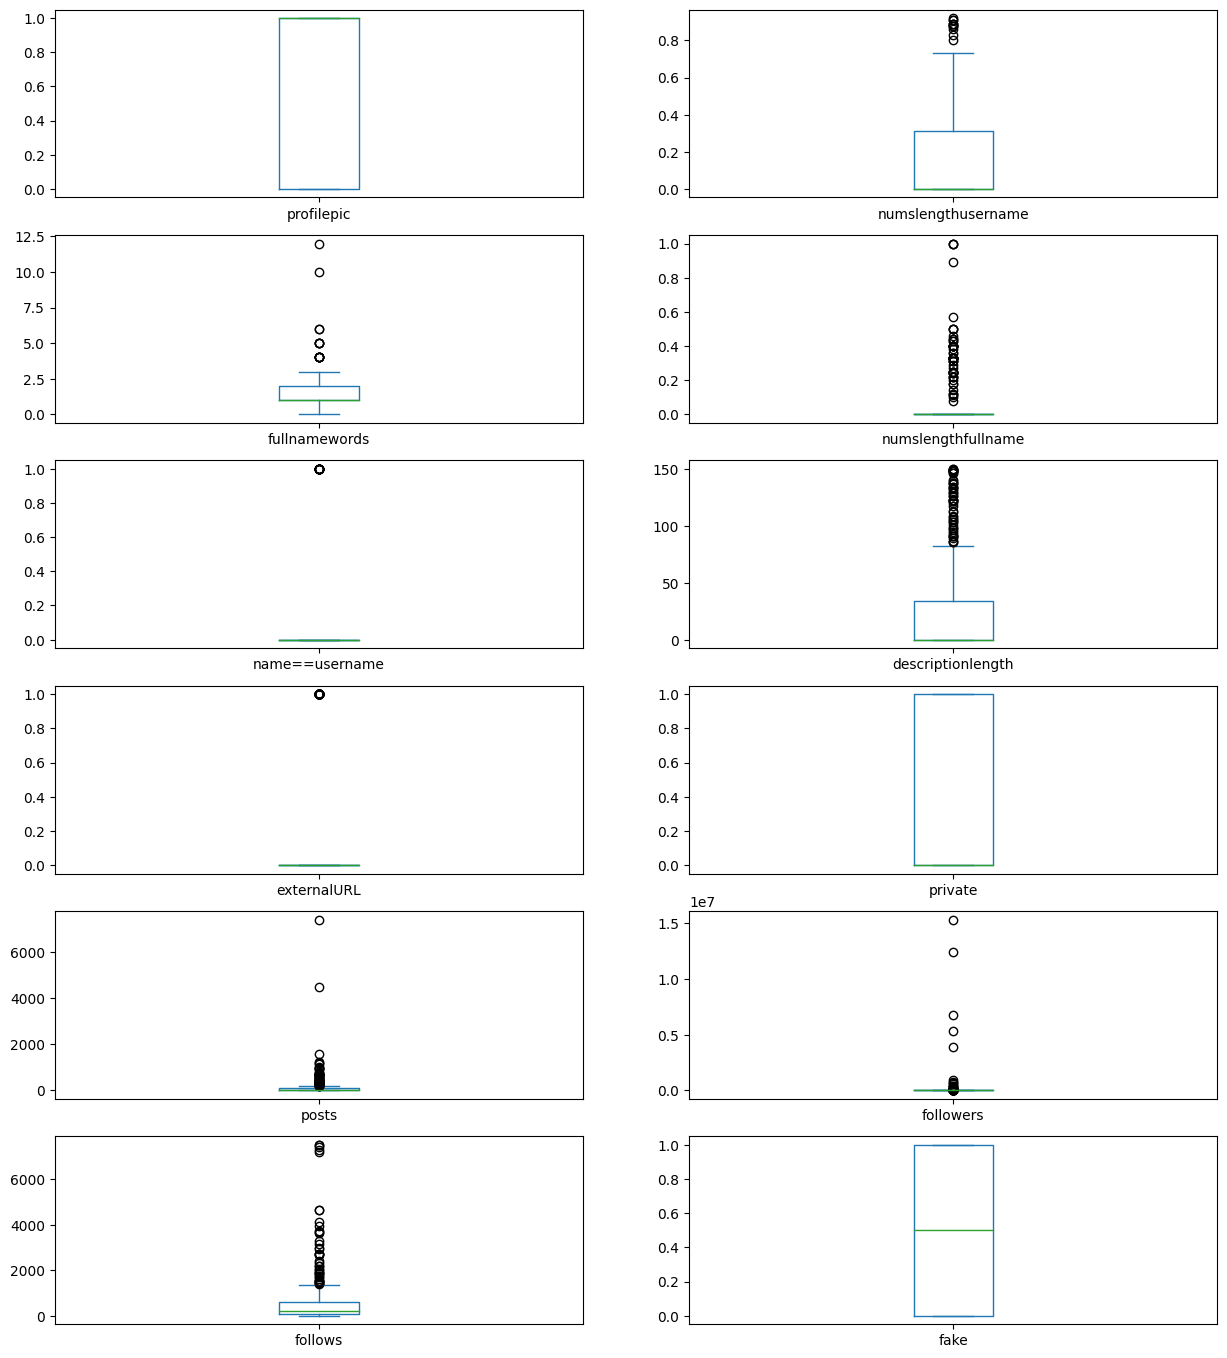

In [14]:
#BoxPlot for all numerical feature in the dataset
dataset.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20));

In [18]:
#Visualzation of the dataset 

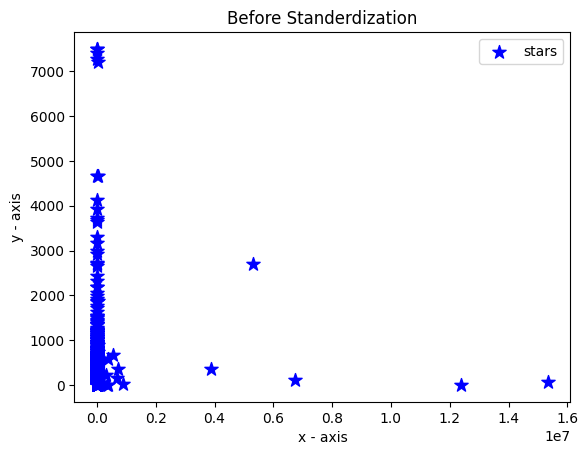

In [19]:
#Scatter plot of two features viz Followers and Follows Before Standardization
#The scatter plot visually represents the relationship between the 'followers' and 'follows' columns, allowing you to observe any patterns or trends in the data points.
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(dataset.followers,dataset.follows, label="stars",color="blue",marker="*",s=100)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Before Standerdization')
plt.legend()
plt.show()

In [20]:
#Standardization of follows feature using Z - Score Test (Formula Method)

In [15]:
dataset.follows

0      955
1      533
2       98
3      651
4      126
      ... 
571    596
572     75
573    339
574     73
575    487
Name: follows, Length: 576, dtype: int64

In [16]:
n=len(dataset.follows)
mean_ans=0
ans=0
j=0


In [17]:
for i in dataset.follows:
    j=j+i
    k=i*i
    ans=ans+k
print(n)
print("Summanation (x) : ",j)
print("Summanation (x^2) : ",ans)

576
Summanation (x) :  292828
Summanation (x^2) :  633414962


In [18]:
part1=ans/n
part2=mean_ans*mean_ans
sd=part1-part2
print("Standard Diviation : ",sd)

Standard Diviation :  1099678.7534722222


In [19]:
mean=j/n
mean

508.38194444444446

In [20]:
final_z_score=[]
for i in dataset.follows:
    z_score=(i-mean)/sd
    final_z_score.append("{:.20f}".format(z_score))

In [21]:
print("\nOriginal Dataset | Z - Score")
print()
for i in range(len(dataset.follows)):
    print(" ",dataset.follows[i],"  | ",final_z_score[i])


Original Dataset | Z - Score

  955   |  0.00040613502274674715
  533   |  0.00002238658833575199
  98   |  -0.00037318348031065298
  651   |  0.00012969065293408713
  126   |  -0.00034772149888053953
  150   |  -0.00032589694336901376
  177   |  -0.00030134431841854722
  76   |  -0.00039318932286288492
  2713   |  0.00200478371396601131
  813   |  0.00027700640263688623
  1173   |  0.00060437473530977311
  365   |  -0.00013038530024492853
  583   |  0.00006785441231809739
  248   |  -0.00023678000836361679
  2701   |  0.00199387143621024840
  900   |  0.00035612041636616721
  289   |  -0.00019949639269809354
  694   |  0.00016879298155890419
  1878   |  0.00124547105346084334
  776   |  0.00024336021288995062
  999   |  0.00044614670785121110
  416   |  -0.00008400811978293624
  470   |  -0.00003490286988200321
  956   |  0.00040704437922639406
  61   |  -0.00040682967005758856
  179   |  -0.00029952560545925340
  665   |  0.00014242164364914385
  176   |  -0.00030225367489819413
  1

In [22]:
dataset_preprocess=dataset
print(dataset_preprocess)
dataset_preprocess.follows=final_z_score

     profilepic  numslengthusername  fullnamewords  numslengthfullname  \
0             1                0.27              0                0.00   
1             1                0.00              2                0.00   
2             1                0.10              2                0.00   
3             1                0.00              1                0.00   
4             1                0.00              2                0.00   
..          ...                 ...            ...                 ...   
571           1                0.55              1                0.44   
572           1                0.38              1                0.33   
573           1                0.57              2                0.00   
574           1                0.57              1                0.00   
575           1                0.27              1                0.00   

     name==username  descriptionlength  externalURL  private  posts  \
0                 0                 53  

In [23]:
dataset

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,0.00040613502274674715,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,0.00002238658833575199,0
2,1,0.10,2,0.00,0,0,0,1,13,159,-0.00037318348031065298,0
3,1,0.00,1,0.00,0,82,0,0,679,414,0.00012969065293408713,0
4,1,0.00,2,0.00,0,0,0,1,6,151,-0.00034772149888053953,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,0.00007967604655350720,1
572,1,0.38,1,0.33,0,21,0,0,44,66,-0.00039409867934253183,1
573,1,0.57,2,0.00,0,0,0,0,4,96,-0.00015402856871574814,1
574,1,0.57,1,0.00,0,11,0,0,0,57,-0.00039591739230182565,1


Standardization can be also done using the below code snippet 

from sklearn.preprocessing import StandardScaler

# Assume 'data' is your dataset
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
standardized_data = scaler.fit_transform(data)

# 'standardized_data' now contains the standardized version of your dataset



In [30]:
#Normalization of numslengthusername feature using MinMaxScaler Method

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df= pd.DataFrame(dataset.numslengthusername)

print(df)

normalized_data = scaler.fit_transform(df)

print(normalized_data)


     numslengthusername
0                  0.27
1                  0.00
2                  0.10
3                  0.00
4                  0.00
..                  ...
571                0.55
572                0.38
573                0.57
574                0.57
575                0.27

[576 rows x 1 columns]
[[0.29347826]
 [0.        ]
 [0.10869565]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.31521739]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.14130435]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.19565217]
 [0.35869565]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [

In [28]:
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)


     numslengthusername
0              0.293478
1              0.000000
2              0.108696
3              0.000000
4              0.000000
..                  ...
571            0.597826
572            0.413043
573            0.619565
574            0.619565
575            0.293478

[576 rows x 1 columns]


In [29]:
dataset.numslengthusername=normalized_data

In [30]:
dataset

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.293478,0,0.00,0,53,0,0,32,1000,0.00040613502274674715,0
1,1,0.000000,2,0.00,0,44,0,0,286,2740,0.00002238658833575199,0
2,1,0.108696,2,0.00,0,0,0,1,13,159,-0.00037318348031065298,0
3,1,0.000000,1,0.00,0,82,0,0,679,414,0.00012969065293408713,0
4,1,0.000000,2,0.00,0,0,0,1,6,151,-0.00034772149888053953,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.597826,1,0.44,0,0,0,0,33,166,0.00007967604655350720,1
572,1,0.413043,1,0.33,0,21,0,0,44,66,-0.00039409867934253183,1
573,1,0.619565,2,0.00,0,0,0,0,4,96,-0.00015402856871574814,1
574,1,0.619565,1,0.00,0,11,0,0,0,57,-0.00039591739230182565,1


In [31]:
#Normalization of fullnamewords feature using MinMaxScaler Method

In [32]:
scaler = MinMaxScaler()

df= pd.DataFrame(dataset.fullnamewords)

print(df)

normalized_data = scaler.fit_transform(df)

print(normalized_data)


     fullnamewords
0                0
1                2
2                2
3                1
4                2
..             ...
571              1
572              1
573              2
574              1
575              1

[576 rows x 1 columns]
[[0.        ]
 [0.16666667]
 [0.16666667]
 [0.08333333]
 [0.16666667]
 [0.33333333]
 [0.16666667]
 [0.16666667]
 [0.        ]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.25      ]
 [0.25      ]
 [0.25      ]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.08333333]
 [0.16666667]
 [0.08333333]
 [0.        ]
 [0.08333333]
 [0.5       ]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.        ]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.        ]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.        ]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.33333333]
 [0.25      ]
 [0.16666667]
 [0.16666667]
 [0.08333333]
 [0.        ]
 [0.25      ]
 [0.16666667]
 [0.08333333]
 [0.16

In [33]:
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)


     fullnamewords
0         0.000000
1         0.166667
2         0.166667
3         0.083333
4         0.166667
..             ...
571       0.083333
572       0.083333
573       0.166667
574       0.083333
575       0.083333

[576 rows x 1 columns]


In [34]:
dataset.fullnamewords=normalized_data

In [35]:
dataset

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.293478,0.000000,0.00,0,53,0,0,32,1000,0.00040613502274674715,0
1,1,0.000000,0.166667,0.00,0,44,0,0,286,2740,0.00002238658833575199,0
2,1,0.108696,0.166667,0.00,0,0,0,1,13,159,-0.00037318348031065298,0
3,1,0.000000,0.083333,0.00,0,82,0,0,679,414,0.00012969065293408713,0
4,1,0.000000,0.166667,0.00,0,0,0,1,6,151,-0.00034772149888053953,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.597826,0.083333,0.44,0,0,0,0,33,166,0.00007967604655350720,1
572,1,0.413043,0.083333,0.33,0,21,0,0,44,66,-0.00039409867934253183,1
573,1,0.619565,0.166667,0.00,0,0,0,0,4,96,-0.00015402856871574814,1
574,1,0.619565,0.083333,0.00,0,11,0,0,0,57,-0.00039591739230182565,1


In [36]:
#Standardization of descriptionlength feature using Z - Score Test

In [37]:
n=len(dataset.descriptionlength)
mean_ans=0
ans=0
j=0

In [38]:
for i in dataset.descriptionlength:
    j=j+i
    k=i*i
    ans=ans+k
print(n)
print("Summanation (x) : ",j)
print("Summanation (x^2) : ",ans)

576
Summanation (x) :  13031
Summanation (x^2) :  1112175


In [39]:
part1=ans/n
part2=mean_ans*mean_ans
sd=part1-part2
print("Standard Diviation : ",sd)

Standard Diviation :  1930.859375


In [40]:
mean=j/n
mean

22.62326388888889

In [41]:
final_z_score=[]
for i in dataset.descriptionlength:
    z_score=(i-mean)/sd
    final_z_score.append("{:.20f}".format(z_score))

In [42]:
print("\nOriginal Dataset | Z - Score")
print()
for i in range(len(dataset.follows)):
    print(" ",dataset.follows[i],"  | ",final_z_score[i])


Original Dataset | Z - Score

  0.00040613502274674715   |  0.01573223638366264346
  0.00002238658833575199   |  0.01107109942230314475
  -0.00037318348031065298   |  -0.01171668127767662437
  0.00012969065293408713   |  0.03075145548137658488
  -0.00034772149888053953   |  -0.01171668127767662437
  -0.00032589694336901376   |  0.03023355137455886049
  -0.00030134431841854722   |  0.01417852406320947722
  -0.00039318932286288492   |  -0.01171668127767662437
  0.00200478371396601131   |  0.02505451030638164087
  0.00027700640263688623   |  0.00899948299503225586
  0.00060437473530977311   |  0.01625014049048036438
  -0.00013038530024492853   |  0.01625014049048036438
  0.00006785441231809739   |  -0.01171668127767662437
  -0.00023678000836361679   |  0.04162744172454874853
  0.00199387143621024840   |  0.03903792119046013698
  0.00035612041636616721   |  0.01210690763593858833
  -0.00019949639269809354   |  -0.01171668127767662437
  0.00016879298155890419   |  0.01314271584957403191
  

In [43]:
dataset_preprocess=dataset
print(dataset_preprocess)
dataset_preprocess.follows=final_z_score

     profilepic  numslengthusername  fullnamewords  numslengthfullname  \
0             1            0.293478       0.000000                0.00   
1             1            0.000000       0.166667                0.00   
2             1            0.108696       0.166667                0.00   
3             1            0.000000       0.083333                0.00   
4             1            0.000000       0.166667                0.00   
..          ...                 ...            ...                 ...   
571           1            0.597826       0.083333                0.44   
572           1            0.413043       0.083333                0.33   
573           1            0.619565       0.166667                0.00   
574           1            0.619565       0.083333                0.00   
575           1            0.293478       0.083333                0.00   

     name==username  descriptionlength  externalURL  private  posts  \
0                 0                 53  

In [44]:
dataset

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.293478,0.000000,0.00,0,53,0,0,32,1000,0.01573223638366264346,0
1,1,0.000000,0.166667,0.00,0,44,0,0,286,2740,0.01107109942230314475,0
2,1,0.108696,0.166667,0.00,0,0,0,1,13,159,-0.01171668127767662437,0
3,1,0.000000,0.083333,0.00,0,82,0,0,679,414,0.03075145548137658488,0
4,1,0.000000,0.166667,0.00,0,0,0,1,6,151,-0.01171668127767662437,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.597826,0.083333,0.44,0,0,0,0,33,166,-0.01171668127767662437,1
572,1,0.413043,0.083333,0.33,0,21,0,0,44,66,-0.00084069503450446214,1
573,1,0.619565,0.166667,0.00,0,0,0,0,4,96,-0.01171668127767662437,1
574,1,0.619565,0.083333,0.00,0,11,0,0,0,57,-0.00601973610268168209,1


In [45]:
#Standardization of posts feature using Z - Score Test

In [46]:
n=len(dataset.posts)
mean_ans=0
ans=0
j=0

In [47]:
for i in dataset.posts:
    j=j+i
    k=i*i
    ans=ans+k
print(n)
print("Summanation (x) : ",j)
print("Summanation (x^2) : ",ans)

576
Summanation (x) :  61914
Summanation (x^2) :  99593328


In [48]:
part1=ans/n
part2=mean_ans*mean_ans
sd=part1-part2
print("Standard Diviation : ",sd)

Standard Diviation :  172905.08333333334


In [49]:
mean=j/n
mean

107.48958333333333

In [50]:
final_z_score=[]
for i in dataset.posts:
    z_score=(i-mean)/sd
    final_z_score.append("{:.20f}".format(z_score))

In [51]:
dataset_preprocess=dataset
print(dataset_preprocess)
dataset_preprocess.posts=final_z_score

     profilepic  numslengthusername  fullnamewords  numslengthfullname  \
0             1            0.293478       0.000000                0.00   
1             1            0.000000       0.166667                0.00   
2             1            0.108696       0.166667                0.00   
3             1            0.000000       0.083333                0.00   
4             1            0.000000       0.166667                0.00   
..          ...                 ...            ...                 ...   
571           1            0.597826       0.083333                0.44   
572           1            0.413043       0.083333                0.33   
573           1            0.619565       0.166667                0.00   
574           1            0.619565       0.083333                0.00   
575           1            0.293478       0.083333                0.00   

     name==username  descriptionlength  externalURL  private  posts  \
0                 0                 53  

In [52]:
dataset

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.293478,0.000000,0.00,0,53,0,0,-0.00043659551169933787,1000,0.01573223638366264346,0
1,1,0.000000,0.166667,0.00,0,44,0,0,0.00103241855719491587,2740,0.01107109942230314475,0
2,1,0.108696,0.166667,0.00,0,0,0,1,-0.00054648239086859307,159,-0.01171668127767662437,0
3,1,0.000000,0.083333,0.00,0,82,0,0,0.00330534190001161498,414,0.03075145548137658488,0
4,1,0.000000,0.166667,0.00,0,0,0,1,-0.00058696703056252916,151,-0.01171668127767662437,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.597826,0.083333,0.44,0,0,0,0,-0.00043081199174306128,166,-0.01171668127767662437,1
572,1,0.413043,0.083333,0.33,0,21,0,0,-0.00036719327222401881,66,-0.00084069503450446214,1
573,1,0.619565,0.166667,0.00,0,0,0,0,-0.00059853407047508233,96,-0.01171668127767662437,1
574,1,0.619565,0.083333,0.00,0,11,0,0,-0.00062166815030018877,57,-0.00601973610268168209,1


In [53]:
#Standardization of followers feature using Z - Score Test

In [54]:
n=len(dataset.followers)
mean_ans=0
ans=0
j=0

In [55]:
for i in dataset.followers:
    j=j+i
    k=i*i
    ans=ans+k
print(n)
print("Summanation (x) : ",j)
print("Summanation (x^2) : ",ans)

576
Summanation (x) :  49136968
Summanation (x^2) :  480504612542204


In [56]:
part1=ans/n
part2=mean_ans*mean_ans
sd=part1-part2
print("Standard Diviation : ",sd)

Standard Diviation :  834209396774.6597


In [57]:
mean=j/n
mean

85307.23611111111

In [58]:
final_z_score=[]
for i in dataset.followers:
    z_score=(i-mean)/sd
    final_z_score.append("{:.20f}".format(z_score))

In [59]:
dataset_preprocess=dataset
print(dataset_preprocess)
dataset_preprocess.followers=final_z_score

     profilepic  numslengthusername  fullnamewords  numslengthfullname  \
0             1            0.293478       0.000000                0.00   
1             1            0.000000       0.166667                0.00   
2             1            0.108696       0.166667                0.00   
3             1            0.000000       0.083333                0.00   
4             1            0.000000       0.166667                0.00   
..          ...                 ...            ...                 ...   
571           1            0.597826       0.083333                0.44   
572           1            0.413043       0.083333                0.33   
573           1            0.619565       0.166667                0.00   
574           1            0.619565       0.083333                0.00   
575           1            0.293478       0.083333                0.00   

     name==username  descriptionlength  externalURL  private  \
0                 0                 53         

In [60]:
dataset

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.293478,0.000000,0.00,0,53,0,0,-0.00043659551169933787,-0.00000010106243880382,0.01573223638366264346,0
1,1,0.000000,0.166667,0.00,0,44,0,0,0.00103241855719491587,-0.00000009897663156318,0.01107109942230314475,0
2,1,0.108696,0.166667,0.00,0,0,0,1,-0.00054648239086859307,-0.00000010207057897013,-0.01171668127767662437,0
3,1,0.000000,0.083333,0.00,0,82,0,0,0.00330534190001161498,-0.00000010176490032279,0.03075145548137658488,0
4,1,0.000000,0.166667,0.00,0,0,0,1,-0.00058696703056252916,-0.00000010208016888848,-0.01171668127767662437,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.597826,0.083333,0.44,0,0,0,0,-0.00043081199174306128,-0.00000010206218779157,-0.01171668127767662437,1
572,1,0.413043,0.083333,0.33,0,21,0,0,-0.00036719327222401881,-0.00000010218206177092,-0.00084069503450446214,1
573,1,0.619565,0.166667,0.00,0,0,0,0,-0.00059853407047508233,-0.00000010214609957712,-0.01171668127767662437,1
574,1,0.619565,0.083333,0.00,0,11,0,0,-0.00062166815030018877,-0.00000010219285042906,-0.00601973610268168209,1


In [61]:
#Standardization of descriptionlength feature using Z - Score Test

In [62]:
n=len(dataset.descriptionlength)
mean_ans=0
ans=0
j=0

In [63]:
for i in dataset.descriptionlength:
    j=j+i
    k=i*i
    ans=ans+k
print(n)
print("Summanation (x) : ",j)
print("Summanation (x^2) : ",ans)

576
Summanation (x) :  13031
Summanation (x^2) :  1112175


In [64]:
part1=ans/n
part2=mean_ans*mean_ans
sd=part1-part2
print("Standard Diviation : ",sd)

Standard Diviation :  1930.859375


In [65]:
mean=j/n
mean

22.62326388888889

In [66]:
final_z_score=[]
for i in dataset.descriptionlength:
    z_score=(i-mean)/sd
    final_z_score.append("{:.20f}".format(z_score))

In [67]:
dataset_preprocess=dataset
print(dataset_preprocess)
dataset_preprocess.descriptionlength=final_z_score

     profilepic  numslengthusername  fullnamewords  numslengthfullname  \
0             1            0.293478       0.000000                0.00   
1             1            0.000000       0.166667                0.00   
2             1            0.108696       0.166667                0.00   
3             1            0.000000       0.083333                0.00   
4             1            0.000000       0.166667                0.00   
..          ...                 ...            ...                 ...   
571           1            0.597826       0.083333                0.44   
572           1            0.413043       0.083333                0.33   
573           1            0.619565       0.166667                0.00   
574           1            0.619565       0.083333                0.00   
575           1            0.293478       0.083333                0.00   

     name==username  descriptionlength  externalURL  private  \
0                 0                 53         

In [68]:
dataset

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.293478,0.000000,0.00,0,0.01573223638366264346,0,0,-0.00043659551169933787,-0.00000010106243880382,0.01573223638366264346,0
1,1,0.000000,0.166667,0.00,0,0.01107109942230314475,0,0,0.00103241855719491587,-0.00000009897663156318,0.01107109942230314475,0
2,1,0.108696,0.166667,0.00,0,-0.01171668127767662437,0,1,-0.00054648239086859307,-0.00000010207057897013,-0.01171668127767662437,0
3,1,0.000000,0.083333,0.00,0,0.03075145548137658488,0,0,0.00330534190001161498,-0.00000010176490032279,0.03075145548137658488,0
4,1,0.000000,0.166667,0.00,0,-0.01171668127767662437,0,1,-0.00058696703056252916,-0.00000010208016888848,-0.01171668127767662437,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.597826,0.083333,0.44,0,-0.01171668127767662437,0,0,-0.00043081199174306128,-0.00000010206218779157,-0.01171668127767662437,1
572,1,0.413043,0.083333,0.33,0,-0.00084069503450446214,0,0,-0.00036719327222401881,-0.00000010218206177092,-0.00084069503450446214,1
573,1,0.619565,0.166667,0.00,0,-0.01171668127767662437,0,0,-0.00059853407047508233,-0.00000010214609957712,-0.01171668127767662437,1
574,1,0.619565,0.083333,0.00,0,-0.00601973610268168209,0,0,-0.00062166815030018877,-0.00000010219285042906,-0.00601973610268168209,1


In [69]:
dataset.head(10)

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
0,1,0.293478,0.000000,0.0,0,0.01573223638366264346,0,0,-0.00043659551169933787,-0.00000010106243880382,0.01573223638366264346,0
1,1,0.000000,0.166667,0.0,0,0.01107109942230314475,0,0,0.00103241855719491587,-0.00000009897663156318,0.01107109942230314475,0
2,1,0.108696,0.166667,0.0,0,-0.01171668127767662437,0,1,-0.00054648239086859307,-0.00000010207057897013,-0.01171668127767662437,0
3,1,0.000000,0.083333,0.0,0,0.03075145548137658488,0,0,0.00330534190001161498,-0.00000010176490032279,0.03075145548137658488,0
4,1,0.000000,0.166667,0.0,0,-0.01171668127767662437,0,1,-0.00058696703056252916,-0.00000010208016888848,-0.01171668127767662437,0
5,1,0.000000,0.333333,0.0,0,0.03023355137455886049,1,0,0.00136786271465895795,0.00000070087889940998,0.03023355137455886049,0
6,1,0.000000,0.166667,0.0,0,0.01417852406320947722,0,0,-0.00052913183099976332,-0.00000010211493234249,0.01417852406320947722,0
7,1,0.000000,0.166667,0.0,0,-0.01171668127767662437,0,0,-0.00043081199174306128,-0.00000010096893709993,-0.01171668127767662437,0
8,1,0.000000,0.000000,0.0,0,0.02505451030638164087,0,0,-0.00020525471344827432,-0.00000010007467721400,0.02505451030638164087,0
9,1,0.000000,0.166667,0.0,0,0.00899948299503225586,1,0,0.00061022160038672470,-0.00000008674349197083,0.00899948299503225586,0


In [70]:
dataset.tail(10)

,profilepic,numslengthusername,fullnamewords,numslengthfullname,name==username,descriptionlength,externalURL,private,posts,followers,follows,fake
566,1,0.293478,0.083333,0.00,0,-0.00187650324813990626,0,0,-0.00057539999064997599,-0.00000010211013738331,-0.00187650324813990626,1
567,1,0.271739,0.083333,0.00,0,-0.01171668127767662437,0,1,-0.00003174911475997667,-0.00000010221442774534,-0.01171668127767662437,1
568,1,0.467391,0.083333,0.00,0,-0.00912716074358801456,0,0,-0.00058696703056252916,-0.00000010218206177092,-0.00912716074358801456,1
569,1,0.336957,0.250000,0.00,0,-0.01171668127767662437,0,0,-0.00047708015139327401,-0.00000010215688823526,-0.01171668127767662437,1
570,1,0.217391,0.083333,0.00,0,0.00278463371321959223,0,0,-0.00062166815030018877,-0.00000010224319750039,0.00278463371321959223,1
571,1,0.597826,0.083333,0.44,0,-0.01171668127767662437,0,0,-0.00043081199174306128,-0.00000010206218779157,-0.01171668127767662437,1
572,1,0.413043,0.083333,0.33,0,-0.00084069503450446214,0,0,-0.00036719327222401881,-0.00000010218206177092,-0.00084069503450446214,1
573,1,0.619565,0.166667,0.00,0,-0.01171668127767662437,0,0,-0.00059853407047508233,-0.00000010214609957712,-0.01171668127767662437,1
574,1,0.619565,0.083333,0.00,0,-0.00601973610268168209,0,0,-0.00062166815030018877,-0.00000010219285042906,-0.00601973610268168209,1
575,1,0.293478,0.083333,0.00,0,-0.01171668127767662437,0,0,-0.00061010111038763549,-0.00000010208136762827,-0.01171668127767662437,1


<Axes: >

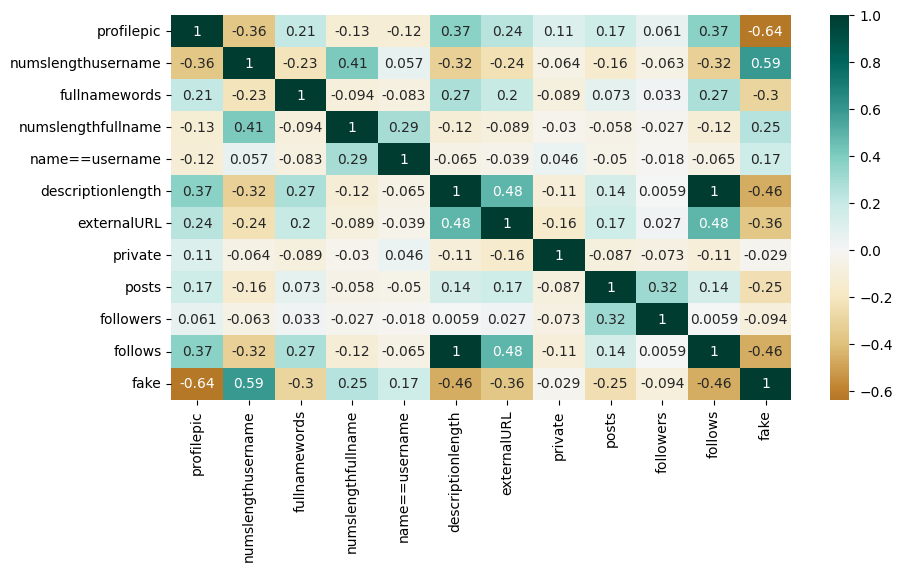

In [71]:
#Generating HeatMap heatmap of the correlation matrix for the columns in the dataset
import seaborn as sns
cormatrix=dataset.corr()
plt.figure(1,figsize=(10,5))
sns.heatmap(cormatrix,cmap='BrBG',center=0,annot=True)

In [ ]:
#The heatmap visualizes the correlations between different pairs of columns in the dataset. Darker colors indicate stronger correlations (positive or negative), while lighter colors indicate weaker or no correlations. The annotations provide the actual correlation values for each pair of columns. This visualization helps in understanding the relationships between variables in the dataset.

Text(0, 0.5, 'Count')

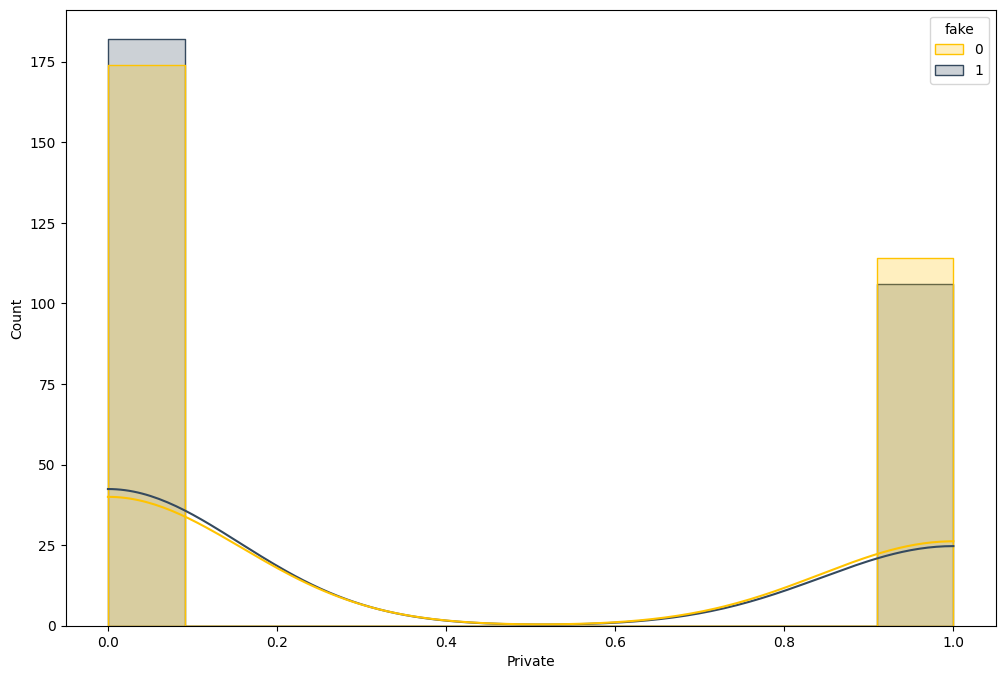

In [72]:
#The histogram plot visualizes the distribution of the 'private' column in the dataset, with the data separated by the 'fake' column. It allows to compare the distributions of 'private' for different categories of 'fake'.
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(dataset, x='private', hue='fake', palette=['#FFC300', '#34495E'], element='step', kde=True)
ax.set_xlabel('Private')
ax.set_ylabel('Count')

Text(0.5, 1.0, 'Private Accounts being Fake')

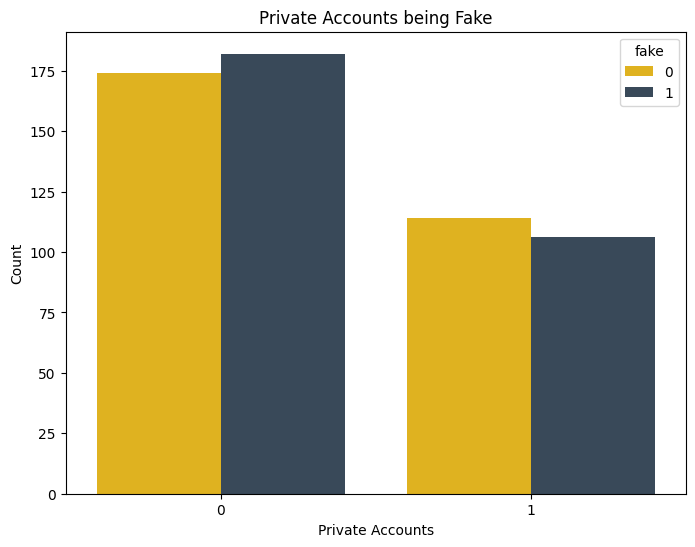

In [73]:
#Bar plot based on Private accounts being Fake accounts
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(dataset,x='private', hue='fake', palette=['#FFC300', '#34495E'])
ax.set_xlabel('Private Accounts')
ax.set_ylabel('Count')
ax.set_title('Private Accounts being Fake')

#The count plot visualizes the distribution of the 'private' column in the dataset, with the counts of each category separated by the 'fake' column. It provides a quick overview of the distribution of private accounts and how it relates to being fake or not.

In [77]:
#Visulaizing Features using Pie Chart

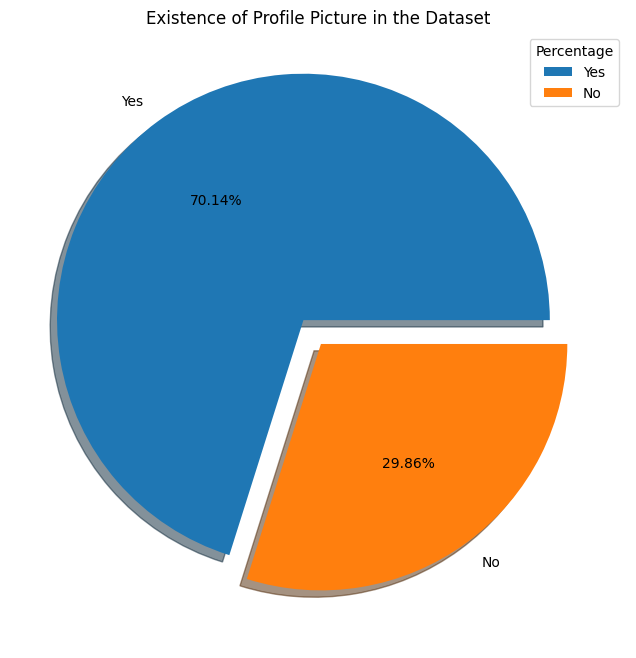

In [100]:
plt.figure(figsize = (9,8))
plt.title("Existence of Profile Picture in the Dataset")
plt.pie(dataset['profilepic'].value_counts(), explode = (0.1, 0.02), labels = ['Yes', 'No'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Percentage", loc = "upper right")

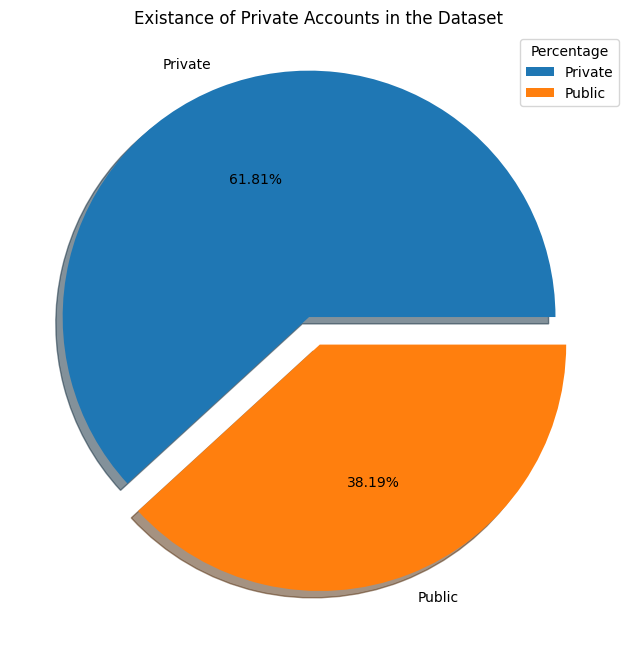

In [101]:
plt.figure(figsize = (9,8))
plt.title("Existance of Private Accounts in the Dataset")
plt.pie(dataset['private'].value_counts(), explode = (0.1, 0.02), labels = ['Private', 'Public'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Percentage", loc = "upper right")

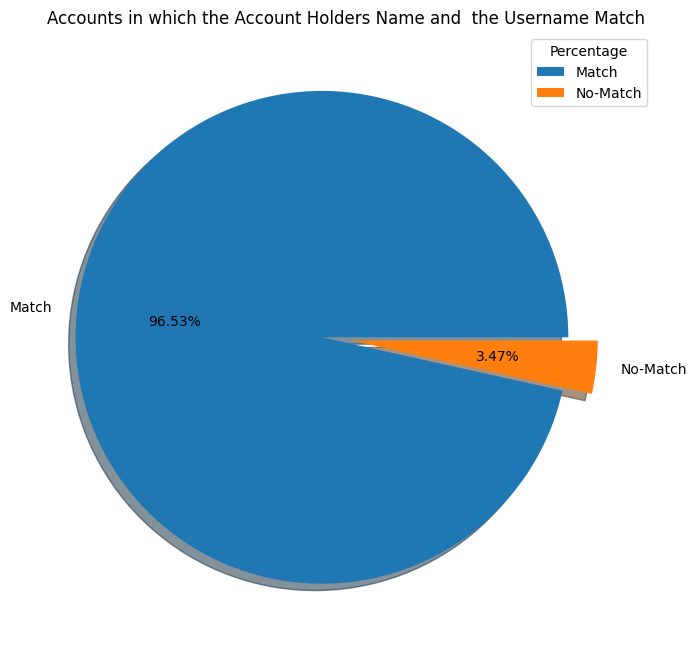

In [102]:
plt.figure(figsize = (9,8))
plt.title("Accounts in which the Account Holders Name and  the Username Match")
plt.pie(dataset['name==username'].value_counts(), explode = (0.1, 0.02), labels = ['Match', 'No-Match'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Percentage", loc = "upper right")

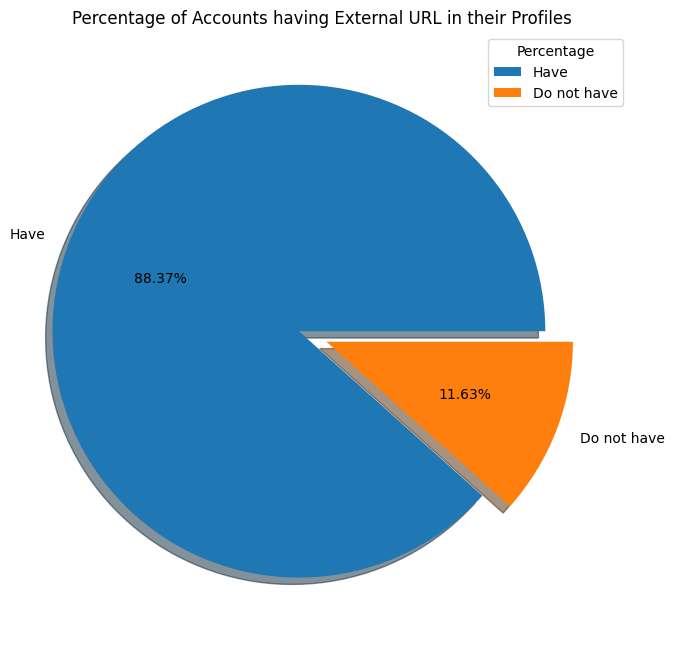

In [103]:
plt.figure(figsize = (9,8))
plt.title("Percentage of Accounts having External URL in their Profiles")
plt.pie(dataset['externalURL'].value_counts(), explode = (0.1, 0.02), labels = ['Have','Do not have'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Percentage", loc = "upper right")

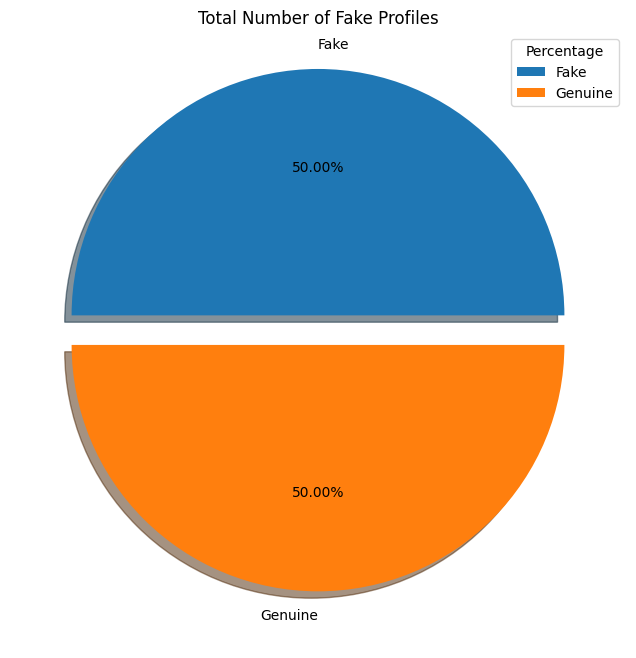

In [104]:
plt.figure(figsize = (9,8))
plt.title("Total Number of Fake Profiles")
plt.pie(dataset['fake'].value_counts(), explode = (0.1, 0.02), labels = ['Fake','Genuine'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Percentage", loc = "upper right")

In [105]:
#function to ignore warnings
import warnings 
warnings.filterwarnings('ignore')

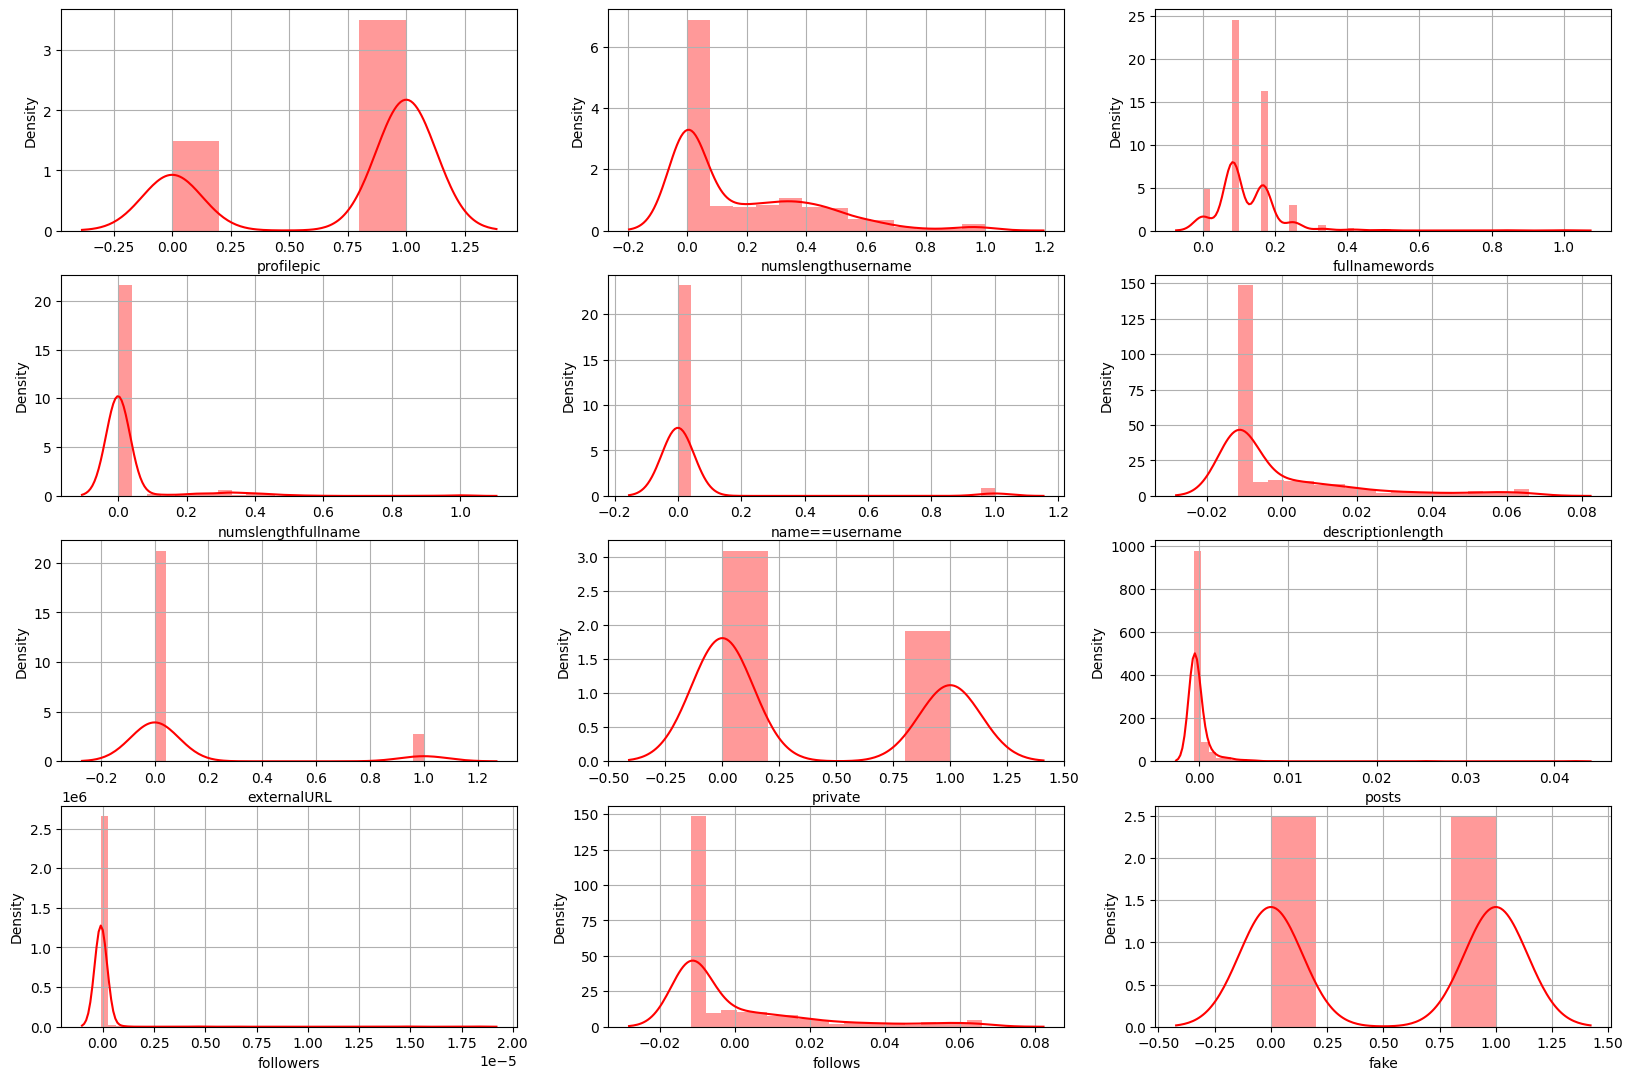

In [106]:
#DistPlot (Density Distribution) Data Distribution of a Variable against Density Distribution for all the Features
plt.figure(figsize = (20, 27))

for i in range(12):
    plt.subplot(8, 3, i+1)
    sns.distplot(dataset.iloc[:, i], color = 'red',kde=True)
    plt.grid()

In [107]:
# Calculate skewness values for each column and sort them in descending order
skewvals = dataset.skew().sort_values(ascending=False)
skewvals

followers             13.679045
posts                 12.986196
name==username         5.096191
numslengthfullname     4.436645
fullnamewords           3.32444
externalURL            2.399713
descriptionlength        1.8668
follows                  1.8668
numslengthusername     1.262902
private                0.487232
fake                        0.0
profilepic            -0.882402
dtype: object

In [108]:
#Displaying only those Features which have Skewness over 0.5
skewlimit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skewvals = dataset.skew()
skewcols = skewvals[abs(skewvals)> skewlimit].sort_values(ascending=False)
skewcols 

followers             13.679045
posts                 12.986196
name==username         5.096191
numslengthfullname     4.436645
fullnamewords           3.32444
externalURL            2.399713
descriptionlength        1.8668
follows                  1.8668
numslengthusername     1.262902
profilepic            -0.882402
dtype: object

In [87]:
#Summary on the Skewness 
from colorama import Fore
from colorama import init as colorama_init
for skew in skewvals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   -0.88240172928413  means that the distribution is approx.   highly skewed 
A skewness value of   1.262901910292869  means that the distribution is approx.   highly skewed 
A skewness value of   3.3244401647213175  means that the distribution is approx.   highly skewed 
A skewness value of   4.436645238006572  means that the distribution is approx.   highly skewed 
A skewness value of   5.096190661874433  means that the distribution is approx.   highly skewed 
A skewness value of   1.8668004695721174  means that the distribution is approx.   highly skewed 
A skewness value of   2.3997126920306884  means that the distribution is approx.   highly skewed 
A skewness value of   0.4872320413461685  means that the distribution is approx.   symmetric 
A skewness value of   12.986195887205705  means that the distribution is approx.   highly skewed 
A skewness value of   13.679044861417731  means that the distribution is approx.   highly skewed 
A skewness value of   1.8668

In [88]:
#Examination of Numerical Features after Pre-Processing

In [89]:
features=dataset.drop("fake",axis=1)
features.describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
profilepic,576.000000,0.701389,0.458047,0.000000,0.000000,1.000000,1.000000,1.000000
numslengthusername,576.000000,0.178083,0.232713,0.000000,0.000000,0.000000,0.336957,1.000000
fullnamewords,576.000000,0.121672,0.087717,0.000000,0.083333,0.083333,0.166667,1.000000
numslengthfullname,576.000000,0.036094,0.125121,0.000000,0.000000,0.000000,0.000000,1.000000
name==username,576.000000,0.034722,0.183234,0.000000,0.000000,0.000000,0.000000,1.000000
externalURL,576.000000,0.116319,0.320886,0.000000,0.000000,0.000000,0.000000,1.000000
private,576.000000,0.381944,0.486285,0.000000,0.000000,0.000000,1.000000,1.000000


In [90]:
dataset[dataset['fake']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
profilepic,288.000000,0.993056,0.083188,0.000000,1.000000,1.000000,1.000000,1.000000
numslengthusername,288.000000,0.041440,0.096297,0.000000,0.000000,0.000000,0.000000,0.489130
fullnamewords,288.000000,0.147859,0.104154,0.000000,0.083333,0.166667,0.166667,1.000000
numslengthfullname,288.000000,0.005243,0.034113,0.000000,0.000000,0.000000,0.000000,0.330000
name==username,288.000000,0.003472,0.058926,0.000000,0.000000,0.000000,0.000000,1.000000
externalURL,288.000000,0.232639,0.423249,0.000000,0.000000,0.000000,0.000000,1.000000
private,288.000000,0.395833,0.489880,0.000000,0.000000,0.000000,1.000000,1.000000
fake,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
dataset[dataset['fake']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
profilepic,288.000000,0.409722,0.492638,0.000000,0.000000,0.000000,1.000000,1.000000
numslengthusername,288.000000,0.314727,0.248502,0.000000,0.095109,0.326087,0.467391,1.000000
fullnamewords,288.000000,0.095486,0.056488,0.000000,0.083333,0.083333,0.083333,0.416667
numslengthfullname,288.000000,0.066944,0.168199,0.000000,0.000000,0.000000,0.000000,1.000000
name==username,288.000000,0.065972,0.248666,0.000000,0.000000,0.000000,0.000000,1.000000
externalURL,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
private,288.000000,0.368056,0.483116,0.000000,0.000000,0.000000,1.000000,1.000000
fake,288.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
#Checking for the Multicolinearity problem in the Dataset 
df_temp = dataset.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count) 

For profilepic and profilepic, there is NO multicollinearity problem
For profilepic and numslengthusername, there is NO multicollinearity problem
For profilepic and fullnamewords, there is NO multicollinearity problem
For profilepic and numslengthfullname, there is NO multicollinearity problem
For profilepic and name==username, there is NO multicollinearity problem
For profilepic and descriptionlength, there is NO multicollinearity problem
For profilepic and externalURL, there is NO multicollinearity problem
For profilepic and private, there is NO multicollinearity problem
For profilepic and posts, there is NO multicollinearity problem
For profilepic and followers, there is NO multicollinearity problem
For profilepic and follows, there is NO multicollinearity problem
For profilepic and fake, there is NO multicollinearity problem
For numslengthusername and profilepic, there is NO multicollinearity problem
For numslengthusername and numslengthusername, there is NO multicollinearity probl

Model Selection, Implementation and Model Building 

In [111]:
#Feature Seperation 
X = dataset.drop(["fake"], axis=1)
y = dataset["fake"]


In [112]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Gaussian NB Model 

Accuracy Score implementing Gaussian NB Model is: 77.58620689655173
F1-score: 0.8142857142857143
Precision: 0.6951219512195121
Recall: 0.9827586206896551
ROC AUC score: 0.9623959571938169


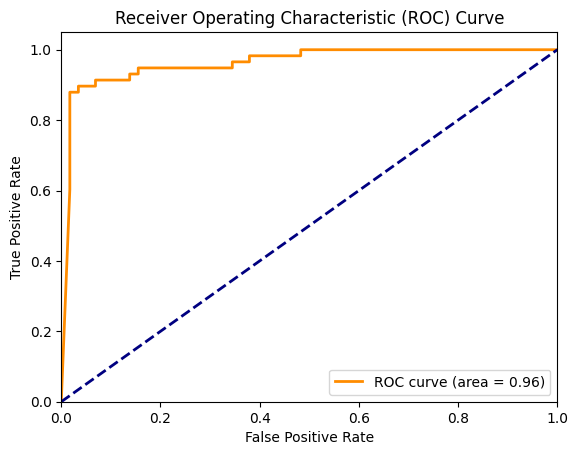

Confusion Matrix:
[[33 25]
 [ 1 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.57      0.72        58
           1       0.70      0.98      0.81        58

    accuracy                           0.78       116
   macro avg       0.83      0.78      0.77       116
weighted avg       0.83      0.78      0.77       116



In [142]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,y_train)

print('Accuracy Score implementing Gaussian NB Model is:',model1.score(X_test,y_test)*100)  

# Predict on the test set
y_pred = model1.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate ROC AUC score (since Gaussian NB doesn't output probabilities, we'll use decision_function)
# Assuming X_test is your test set
if hasattr(model1, "decision_function"):
    y_score = model1.decision_function(X_test)
else:
    y_score = model1.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_score)


print('F1-score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('ROC AUC score:', roc_auc)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import confusion_matrix, classification_report


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

LogisticRegression

Logistic Regression model accuracy (in %): 87.93103448275862
F1-score: 0.8653846153846154
Precision: 0.9782608695652174
Recall: 0.7758620689655172
ROC AUC score: 0.9610582639714625


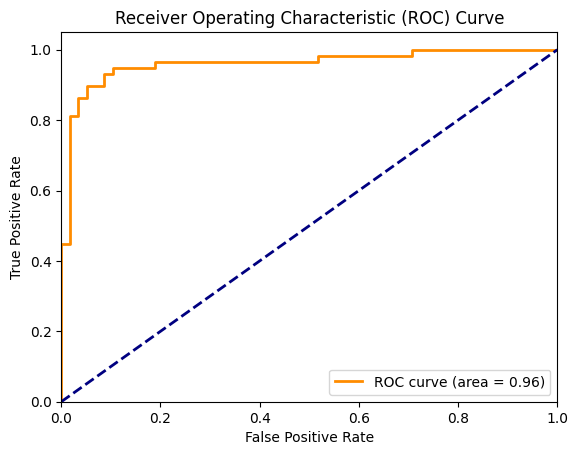

Confusion Matrix:
[[57  1]
 [13 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        58
           1       0.98      0.78      0.87        58

    accuracy                           0.88       116
   macro avg       0.90      0.88      0.88       116
weighted avg       0.90      0.88      0.88       116



In [141]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=101)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate ROC AUC score (assuming predict_proba is available)
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)

# Print additional evaluation metrics
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC score:", roc_auc)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_scores = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

SVM

Accuracy Score implementing Linear SVM is: 88.79310344827587
F1-score: 0.8785046728971961
Precision: 0.9591836734693877
Recall: 0.8103448275862069
ROC AUC score: 0.9729488703923901


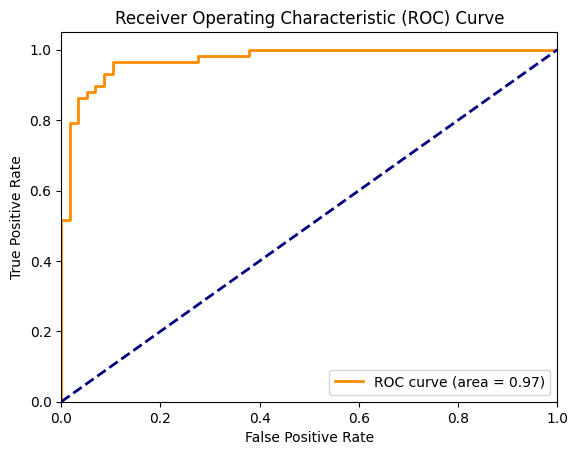

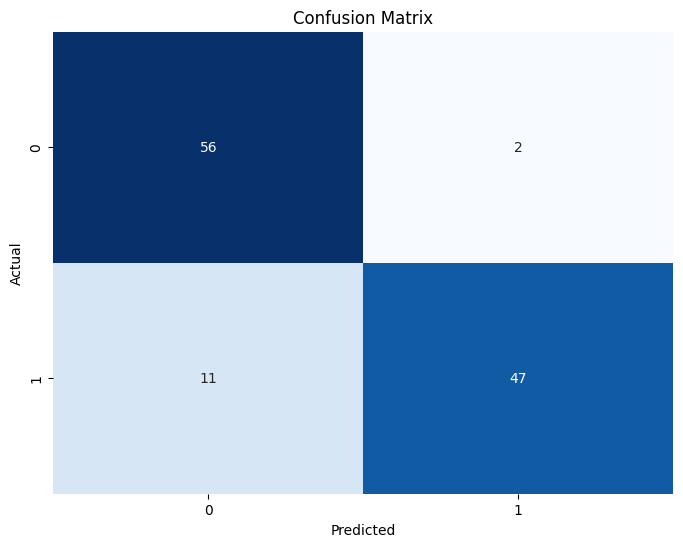

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        58
           1       0.96      0.81      0.88        58

    accuracy                           0.89       116
   macro avg       0.90      0.89      0.89       116
weighted avg       0.90      0.89      0.89       116



In [145]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 101)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score implementing Linear SVM is:", acc * 100)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate ROC AUC score (assuming decision_function is available)
y_score = classifier.decision_function(X_test) if hasattr(classifier, "decision_function") else classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)

# Print additional evaluation metrics
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC score:", roc_auc)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict decision function scores
if hasattr(classifier, "decision_function"):
    y_scores = classifier.decision_function(X_test)
else:
    y_scores = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy is a common metric used to evaluate classification models, representing the proportion of correctly classified instances out of the total instances.

Here are the reported accuracy scores for each model:

Gaussian Naive Bayes (NB) Model: 77.59%
Logistic Regression Model: 87.93%
Linear Support Vector Machine (SVM) Model: 88.79%

These accuracy scores provide insights into the performance of each model on the given dataset. Higher accuracy scores generally indicate better performance, but it's essential to consider other factors such as the nature of the data, model complexity, and potential class imbalances.

It's worth noting that while accuracy is a useful metric, it may not always be sufficient, especially in scenarios with imbalanced classes or when different types of errors have different consequences. In such cases, additional metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) may provide a more comprehensive evaluation of model performance.